In [12]:
%pip install folium


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd

In [14]:
df=pd.read_csv(r"D:\CMSC\project\Crime_Data_from_2020_to_Present.csv")
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [15]:
missing_values = df.isnull().sum()
print(missing_values)

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           112762
Vict Age               0
Vict Sex          107192
Vict Descent      107200
Premis Cd              9
Premis Desc          480
Weapon Used Cd    531448
Weapon Desc       531448
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          755765
Crm Cd 3          813869
Crm Cd 4          815823
LOCATION               0
Cross Street      685361
LAT                    0
LON                    0
dtype: int64


In [16]:
# Columns to be deleted
columns_to_delete = ['Mocodes', 'Vict Sex', 'Vict Descent', 'Weapon Used Cd', 
                     'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street']

# Delete the columns
df.drop(columns=columns_to_delete, axis=1, inplace=True)


df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468


In [17]:
missing_values = df.isnull().sum()
print(missing_values)

DR_NO            0
Date Rptd        0
DATE OCC         0
TIME OCC         0
AREA             0
AREA NAME        0
Rpt Dist No      0
Part 1-2         0
Crm Cd           0
Crm Cd Desc      0
Vict Age         0
Premis Cd        9
Premis Desc    480
Status           0
Status Desc      0
Crm Cd 1        10
LOCATION         0
LAT              0
LON              0
dtype: int64


In [18]:
print(df.columns)

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Vict Age',
       'Premis Cd', 'Premis Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'LOCATION', 'LAT', 'LON'],
      dtype='object')


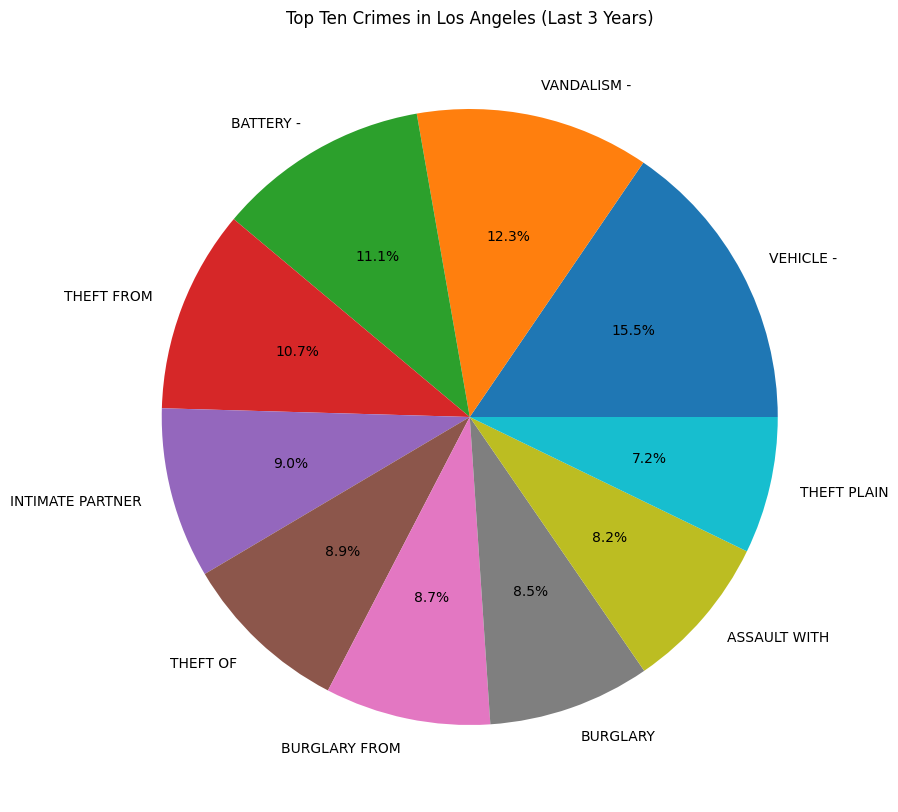

In [19]:
# Shorten the crime type names to their first two words
df['Crm Cd Desc'] = df['Crm Cd Desc'].apply(lambda x: ' '.join(x.split()[:2]))

# Count the occurrences of each crime type
crime_counts = df['Crm Cd Desc'].value_counts()

# Select the top ten crimes based on their frequency
top_ten_crimes = crime_counts.head(10)

# Create the pie chart
plt.figure(figsize=(10, 10))
top_ten_crimes.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top Ten Crimes in Los Angeles (Last 3 Years)')
plt.ylabel('')  # Hide the y-label
plt.show()